In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
#preparing data
X_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)
X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)
n_samples,n_features=X.shape

In [4]:
#model
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)

In [6]:
#loss and optimizers
learning_rate=0.01
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

epoch: 10,loss=502.6465
epoch: 20,loss=456.7195
epoch: 30,loss=423.2269
epoch: 40,loss=398.7909
epoch: 50,loss=380.9558
epoch: 60,loss=367.9336
epoch: 70,loss=358.4221
epoch: 80,loss=351.4730
epoch: 90,loss=346.3944
epoch: 100,loss=342.6819


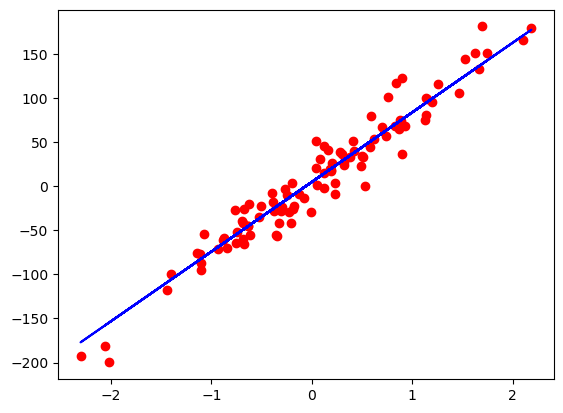

In [10]:
num_epochs=100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted=model(X)
    loss=criterion(y_predicted,y)
    #backward pass
    loss.backward()
    #update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1)%10==0:
        print(f'epoch: {epoch+1},loss={loss.item():.4f}')
predicted=model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()
              